In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import dbscan

from sklearn.datasets import load_iris

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [18]:
# #############################################################################
# Generate sample data
# X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)

iris_data = load_iris()

X = iris_data.data
labels_true = iris_data.target

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
# db = DBSCAN(eps=.543, min_samples=10).fit(X)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
# labels = db.labels_

labels = DBSCAN(eps=.543, min_samples=10).fit_predict(X)
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,
       -1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,
       -1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,
       -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,
       -1, -1,  2, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1,  2, -1, -1, -1,
       -1,  2, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  2,  2,  2, -1,  2,  2,  2, -1, -1, -1, -1],
      dtype=int64)

In [33]:
# Attempt at accuracy, not sure if accuracy is best measurement to use
accuracy = sum(1 for x,y in zip(labels, labels_true) if x == y) / len(labels_true)
print(accuracy)
correct = 0
count = 0
for x,y in zip(labels,labels_true):
    if x != -1 and x == y:
        correct += 1
    count += 1
print(correct / count)

0.5466666666666666
0.5466666666666666


In [59]:
# Attempt at grid search
eps_range = np.linspace(.2,1,500)
minPt_range = np.linspace(5,20,15) # choosing bounds is iffy. how to choose?
eps, minPts = np.meshgrid(eps_range, minPt_range)

X1 = eps.flatten()
X2 = minPts.flatten()

grid = np.array((X1, X2)).T
grid.shape

(7500, 2)

In [60]:
# Getting parameters that resulted is highest accuracy
highest_accuracy_params = []
params = []
for _eps, _minPts in grid:
    labels = DBSCAN(eps=_eps, min_samples=_minPts).fit_predict(X)
    accuracy = sum(1 for x,y in zip(labels, labels_true) if x == y) / len(labels_true)
    params.append(accuracy)

f = np.array(params)
highestAccParamIndex = np.argsort(params)[-1]
highestAccParams = grid[highestAccParamIndex]

highestAccParams

array([0.51743487, 6.07142857])

In [62]:
# Fit model with largest accuracy parameters
labels = DBSCAN(eps=highestAccParams[0], min_samples=highestAccParams[1]).fit_predict(X)
for x,y in zip(labels,labels_true):
    print(x,y)
    if x != -1 and x == y:
        correct += 1
    count += 1
    
print(correct/count)

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
-1 0
-1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
-1 0
-1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
-1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
-1 1
-1 1
1 1
-1 1
-1 1
1 1
-1 1
1 1
1 1
1 1
1 1
1 1
-1 1
1 1
-1 1
1 1
-1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
-1 1
1 1
-1 1
1 1
1 1
1 1
1 1
1 1
-1 1
1 1
1 1
1 1
1 1
-1 1
1 1
-1 2
1 2
2 2
2 2
2 2
-1 2
-1 2
-1 2
-1 2
-1 2
2 2
-1 2
2 2
-1 2
-1 2
2 2
2 2
-1 2
-1 2
-1 2
2 2
-1 2
-1 2
1 2
2 2
-1 2
1 2
-1 2
2 2
-1 2
-1 2
-1 2
2 2
1 2
1 2
-1 2
-1 2
2 2
1 2
2 2
2 2
2 2
1 2
2 2
2 2
2 2
-1 2
2 2
-1 2
-1 2
0.6466666666666666


In [63]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))



Estimated number of clusters: 3
Estimated number of noise points: 41
Homogeneity: 0.651
Completeness: 0.534
V-measure: 0.587
Adjusted Rand Index: 0.537
Adjusted Mutual Information: 0.579
Silhouette Coefficient: 0.254


Estimated number of clusters:  3
Accuracy 0.6466666666666666


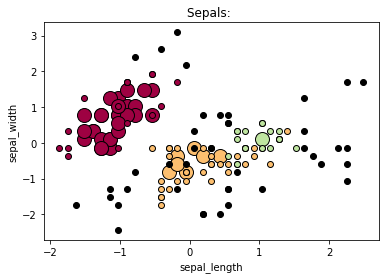

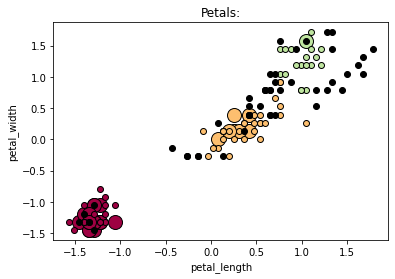

In [74]:
# #############################################################################
print('Estimated number of clusters: ', n_clusters_)
print('Accuracy', correct/count)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Sepals: ')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 2], xy[:, 3], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 2], xy[:, 3], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Petals:')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

# Sample code from sklearn

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


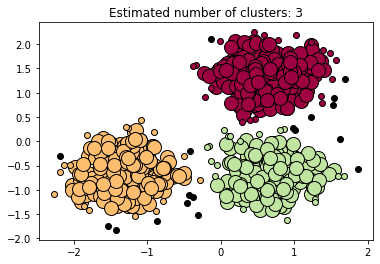

In [6]:
from sklearn.datasets import make_blobs
# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()